Generating region chart..


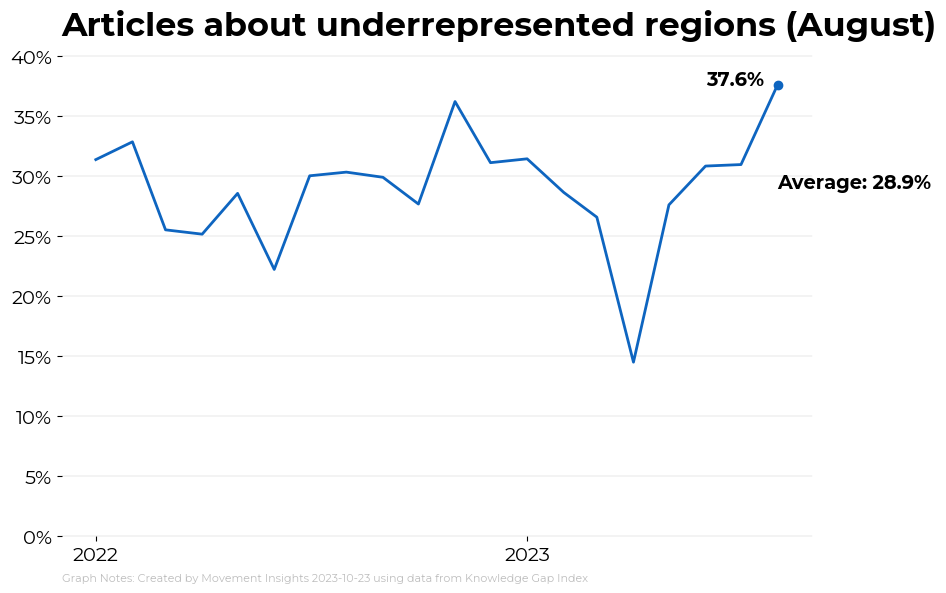

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import calendar
import warnings
%run wikicharts.ipynb


def main():
    
    print("Generating region chart..")
    df = pd.read_csv("../metrics/geo_data_metrics.tsv", sep = '\t')
    #---PARAMETERS---
    save_file_name = "Underrepresented Region Growth.png"
    display_flag = True


    #note start and end dates may be different depending on chart_type
    start_date = "2022-01-01"
    end_date = datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])

    #truncate data to period of interest
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    
    df['% of new articles about underrepresented regions'] =  df['% of new articles about underrepresented regions'] 

    #---MAKE CHART---
     
    
    chart = Wikichart(start_date, end_date, df, time_col='month') # Initialization
    chart.init_plot()

    
    chart.plot_line('month', '% of new articles about underrepresented regions', wmf_colors['blue'])
    #chart.plot_monthlyscatter('time', 'metric_underrepresented', wmf_colors['blue'])
    
    #chart.plot_yoy_highlight('time', 'metric_underrepresented')

  
    chart.format(title='Articles about underrepresented regions', data_source="Knowledge Gap Index", titlepad=15) 
    
    # Annotations 
    
     # Set the y-axis limit from 0 to the maximum value in the 'underrepresented' column
    plt.gca().set_ylim(0.00, df['% of new articles about underrepresented regions'].max()) 

    # Define ticks based on the new y-axis
    ticks = np.arange(0.00, df['% of new articles about underrepresented regions'].max() +0.05, 0.05)
    plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    
    chart.annotate_last_point(x='month', y='% of new articles about underrepresented regions', xytext=(-20, 0), ha='right')
    
    #chart.annotate(x='time',
            #   y='metric_underrepresented',
           #    num_annotation=chart.calc_mean(y='metric_underrepresented', mean_note=""))
    
    mean_y = df['% of new articles about underrepresented regions'].mean()
    plt.annotate(f"Average: {mean_y:.1%}",
            xy=(df['month'].iat[-1], mean_y),
            xytext=(0, 0),  
            xycoords='data',
            textcoords='offset points',
            color='black',
            fontsize=style_parameters['text_font_size'],
            weight='bold',
            family=style_parameters['font'])
    

    # show plot
    chart.finalize_plot(save_file_name, display=display_flag)

if __name__ == "__main__":
    main()


Generating Women % Distribution chart...


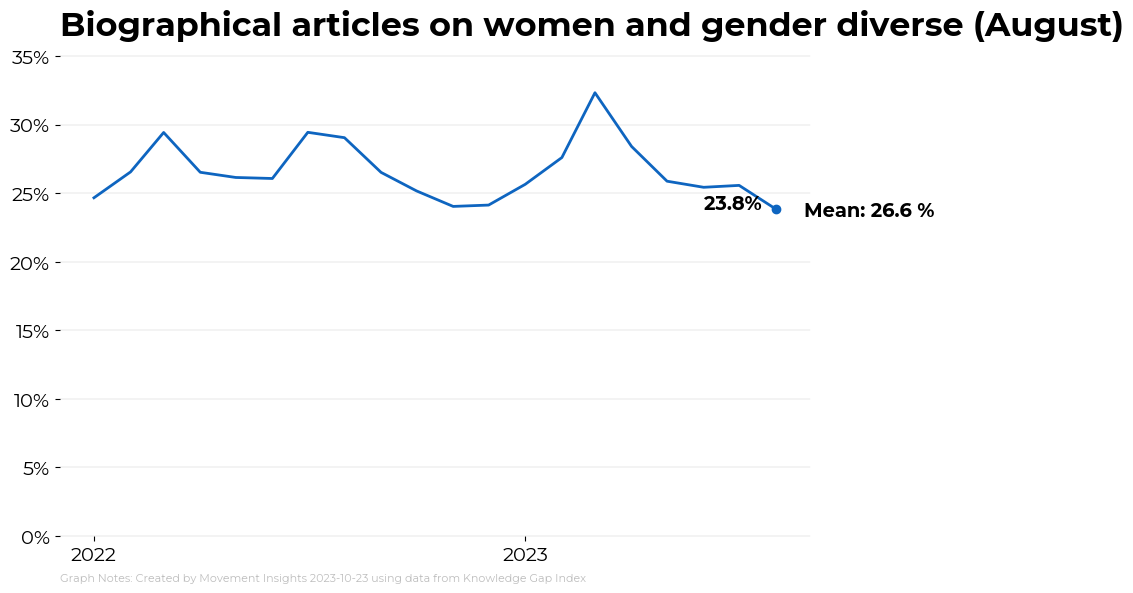

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date, datetime
import calendar
import warnings
%run wikicharts.ipynb


def main():
    print("Generating Women % Distribution chart...")
    df = pd.read_csv("../metrics/gender_data_metrics.tsv", sep = '\t')
    #---PARAMETERS---
    save_file_name = "Women_Percentage_Distribution.png"
    display_flag = True
    
    
    #note start and end dates may be different depending on chart_type
    start_date = "2022-01-01"
    end_date = datetime.today()

    #convert string to datetime
    df['month'] = pd.to_datetime(df['month'])

    #truncate data to period of interest
    df = df[df["month"].isin(pd.date_range(start_date, end_date))]
    
    df['% of new articles about gender minorities'] = df['% of new articles about gender minorities']
    #---MAKE CHART---
     
   
    chart = Wikichart(start_date, end_date, df, time_col='month') # Initialization
    chart.init_plot()

    # Step 2: Layer visuals
    chart.plot_line('month', '% of new articles about gender minorities', wmf_colors['blue'])
    #chart.plot_monthlyscatter('time', 'proportion_of_non_male', wmf_colors['blue'])
    #chart.plot_yoy_highlight('time', 'proportion_of_non_male')
   
    
    chart.format(title='Biographical articles on women and gender diverse', data_source="Knowledge Gap Index",  titlepad=15)
    
   # Set the y-axis limit from 0 to the maximum value in the 'proportion' column
    plt.gca().set_ylim(0.00, df['% of new articles about gender minorities'].max()) 

    # Define ticks based on the new y-axis range
    ticks = np.arange(0.00, df['% of new articles about gender minorities'].max() + 0.05 , 0.05)
    plt.yticks(ticks, [f"{int(tick*100)}%" for tick in ticks])
    

    #  Annotations 
    chart.annotate_last_point(x='month', y='% of new articles about gender minorities', ha='left')
    
    chart.annotate(x='month',
            y='% of new articles about gender minorities',
            num_annotation=chart.calc_mean(y='% of new articles about gender minorities', mean_note=""))
    
    
    # display plot
    chart.finalize_plot(save_file_name, display=display_flag)

if __name__ == "__main__":
    main()
